In [6]:
import torch
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.cider.cider import Cider
import matplotlib.pyplot as plt
import os

# Specify the local folder where your pretrained model is stored
model_path = "./vit_gpt2_captioning_model"  # Replace with your folder name

# ✅ Load the pretrained model, processor, and tokenizer from local files
model = VisionEncoderDecoderModel.from_pretrained(model_path).to("cpu")
processor = ViTImageProcessor.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

def generate_caption(image_path, ground_truth=None):
    """Generate caption using ViT-GPT2 model and calculate BLEU score if ground truth is provided."""
    # Load image from local file or URL
    if image_path.startswith("http"):
        response = requests.get(image_path)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_path).convert("RGB")
    
    # Process image
    inputs = processor(images=image, return_tensors="pt").to("cpu")
    
    # Generate caption
    with torch.no_grad():
        output = model.generate(**inputs)
    caption = tokenizer.decode(output[0], skip_special_tokens=True)
    
    return caption, image


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.48.2"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

Generated Caption: a cat laying on a blanket next to a cat laying on a bed 


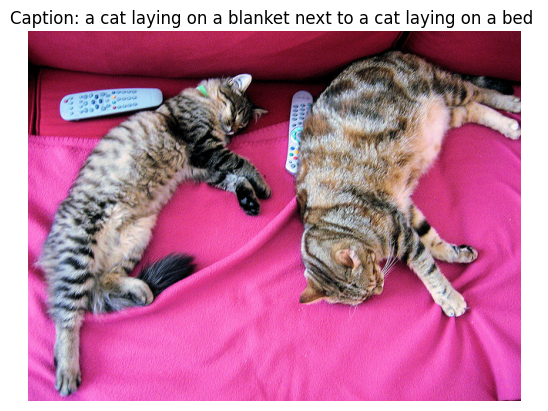

In [7]:
import matplotlib.pyplot as plt

# Replace with the path to your local image
image_path = "000000039769.jpg"  # Ensure this image is available in the directory

# Generate caption
caption, image = generate_caption(image_path)
print("Generated Caption:", caption)

# Visualize the image and generated caption
plt.imshow(image)
plt.axis("off")
plt.title(f"Caption: {caption}")
plt.show()
